Q1.)Number of Fundings

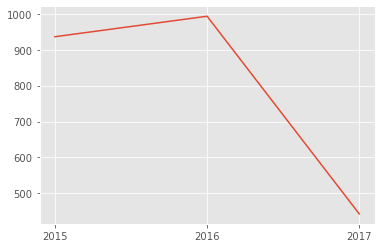

2015 936
2016 993
2017 443


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["ggplot"])

data = pd.read_csv('startup_funding.csv')
Date = data["Date"]

def convertDate(date):
    return date.split("/")[-1]

Years = Date.apply(convertDate)

Years.replace("05.2015","2015",inplace = True) 
Years.replace("01.2015","2015",inplace = True) 
Years.replace("04.2015","2015",inplace = True) 

yrs = Years.value_counts()

yrs.sort_index(inplace = True) 
    
x = yrs.index[0:3]
y = yrs[0:3]

plt.plot(x,y)
plt.show()

for i in range(len(x)):
    print(x[i],y[i])


Q2.)Top Indian Cities

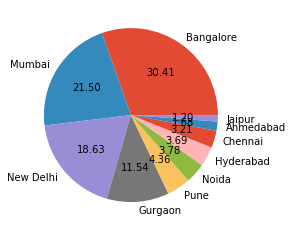

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(["ggplot"])

data = pd.read_csv("startup_funding.csv")

city = data["CityLocation"]

city.dropna(inplace = True)

city = city.replace(["bangalore","Delhi"],["Bangalore","New Delhi"])

city = city.str.split("/",expand = True)[0]

city = city.str.strip() # To get rid of the blank space before any word.

freq = city.value_counts()[:10]

city_name = freq.index

city_number = freq

plt.pie(city_number,labels = city_name,autopct = '%.2f')
plt.show()

for i in range(len(city_name)):
    print(city_name[i],city_number[i])



Q3.)Funding amount

In [3]:
import pandas as pd
import numpy as np

plt.style.use(["ggplot"])

data = pd.read_csv("startup_funding.csv")

city = data["CityLocation"] 

city.replace(["bangalore","Delhi"],["Bangalore","New Delhi"],inplace = True)
city.dropna(inplace = True)
city = city.str.split("/",expand = True)[0]
city = city.str.strip()

def corrAmt(amt):
    return float(str(amt).replace(",",""))

data["AmountInUSD"] = data["AmountInUSD"].apply(corrAmt)

inv = data.groupby(city)['AmountInUSD'].sum().sort_values(ascending = False)[0:10]

inv_vals = inv
inv_labels = inv.index

total_amt = inv_vals.sum()

vals = np.true_divide(inv_vals,total_amt)*100

for i in range(len(vals)):
    print(inv_labels[i],format(vals[i] , ".2f"))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Q4.)Investment Type

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


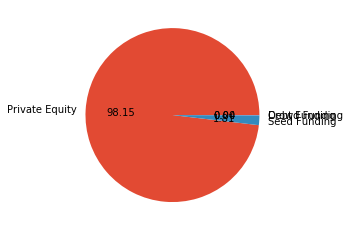

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

data = pd.read_csv('startup_funding.csv')

data.replace(["SeedFunding","PrivateEquity","Crowd funding"],["Seed Funding","Private Equity","Crowd Funding"],inplace = True)
inv = data["InvestmentType"]

# inv.value_counts()
def corrAmt(amt):
    return float(str(amt).replace(",",""))

data["AmountInUSD"] = data["AmountInUSD"].apply(corrAmt)

amount = data.groupby(inv)["AmountInUSD"].sum().sort_values(ascending = False)

ind_type = amount.index
amt = amount

total = amt.sum()

vals = np.true_divide(amt,total)*100

for i in range(len(vals)):
    print(ind_type[i],format(vals[i] , ".2f"))
    
plt.pie(amt,labels = ind_type,autopct = '%.2f')
plt.show()

Q5.)Top Industries

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv("startup_funding.csv")

data.replace(["eCommerce","ECommerce","ecommerce"],["Ecommerce","Ecommerce","Ecommerce"],inplace = True)

def corrAmt(amt):
    return float(str(amt).replace(",",""))

data["AmountInUSD"] = data["AmountInUSD"].apply(corrAmt)

industry_amount=data.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
industry = industry_amount.index
amount = industry_amount

total_amt = amount.sum()

vals = np.true_divide(amount,total_amt)*100

for i in range(len(vals)):
    print(industry[i],format(vals[i] , ".2f"))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


Q6.)Top startups

In [6]:
import pandas as pd

data = pd.read_csv("startup_funding.csv")

data.replace(["Oyo Rooms","OyoRooms","Oyorooms","OYO Rooms"],["Oyo","Oyo","Oyo","Oyo"],inplace = True)
data.replace(["Flipkart.com"],["Flipkart"],inplace = True)
data.replace(["Ola Cabs","Olacabs"],["Ola","Ola"],inplace = True)
data.replace(["Paytm Marketplace"],["Paytm"],inplace = True)

def corrAmt(amt):
    return float(str(amt).replace(",",""))

data["AmountInUSD"] = data["AmountInUSD"].apply(corrAmt)

startup_amount=data.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup = startup_amount.index
for i in startup:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


Q7.)Funding rounds

In [7]:
import pandas as pd

data = pd.read_csv("startup_funding.csv")

data["AmountInUSD"].dropna(inplace = True)
data.replace(["Oyo Rooms","OyoRooms","Oyorooms","OYO Rooms"],["Oyo","Oyo","Oyo","Oyo"],inplace = True)
data.replace(["Flipkart.com"],["Flipkart"],inplace = True)
data.replace(["Ola Cabs","Olacabs"],["Ola","Ola"],inplace = True)
data.replace(["Paytm Marketplace"],["Paytm"],inplace = True)

st_no = data["StartupName"].value_counts().sort_values(ascending = False)[:5]

name = st_no.index
vals = st_no

for i in range(len(name)):
    print(name[i],vals[i])


Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


Q8.)Top Investor


In [8]:
import pandas as pd

data = pd.read_csv("startup_funding.csv")
data["InvestorsName"].dropna(inplace = True)
investors = data["InvestorsName"]
investors = investors[investors != "Undisclosed Investors"]
investors = investors[investors != "Undisclosed investors"]

def createdict(array):
    d = {}
    for i in array:
        if "," not in i:
            if i in d:
                d[i]+=1
            else:
                d[i] = 1
        else:
            s = i.strip().split(",")
            for j in s:
                
                if j.strip() in d:
                    d[j.strip()]+=1
                else:
                    d[j.strip()]=1
    return d

dictionary = createdict(investors)

m = max(dictionary,key = dictionary.get)
print(m,dictionary[m])

Sequoia Capital 64
